In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import geocoder # import geocoder
print('geocoder imported!')
print('Libraries imported.')

geocoder imported!
Libraries imported.


In [2]:
CLIENT_ID = 'LOZJPUZ1RFQGFYKM4VUGQVP2KEVQDFOFHJX2J23Z2UNXMK51' # your Foursquare ID
CLIENT_SECRET = 'V1LRE5ENAULBDZC5AL1HNHXXT3PG0ZRIJBMFZ3TMY2CHHRVA' # your Foursquare Secret
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LOZJPUZ1RFQGFYKM4VUGQVP2KEVQDFOFHJX2J23Z2UNXMK51
CLIENT_SECRET:V1LRE5ENAULBDZC5AL1HNHXXT3PG0ZRIJBMFZ3TMY2CHHRVA


In [3]:
#Find the Latitude and Longitude of Tokyo
address = 'Tokyo, JP'

geolocator = Nominatim(user_agent="japan_explorer")
location = geolocator.geocode(address)
tokyo_lat = location.latitude
tokyo_lng = location.longitude
print('The geograpical coordinate of Tokyo are {}, {}.'.format(tokyo_lat, tokyo_lng))


The geograpical coordinate of Tokyo are 35.6828387, 139.7594549.


In [4]:
#Retrieve Vanue Name and sport from the Olympic website
venue_web = 'https://tokyo2020.org/en/games/venue/olympic/'

page = requests.get(venue_web).text #request page from Wikipedia

soup = BeautifulSoup(page,'html.parser') #arrange text file into html
table = soup.find_all('table')[0] #find table on the page
df_venue = pd.read_html(str(table)) #read table into dataframe
df_venue = pd.DataFrame(df_venue[0]) #convert the table into DataFrame

df_venue = df_venue.drop([0], axis=0) #Drop the old column name which are values on the first row
df_venue = df_venue.drop([0], axis=1) #Drop the old column name which are values on the first row
df_venue = df_venue.drop([2], axis=1) #Drop the old column name which are values on the first row
df_venue.rename(columns={1:'Venue Name',3:'Sport'},inplace=True) #rename columns from 0,1,2

#df_venue = df_venue.drop(['VenueColour'], axis=1)
#df_venue = df_venue.drop(['No.'], axis=1)
#df_venue.rename(columns={'Sport/Discipline':'Sport'},inplace=True) #rename columns from 0,1,2

#Add Venue coordinates
venue_latlng = [['Olympic Stadium',35.678056, 139.714722],
               ['Tokyo Metropolitan Gymnasium',35.679722, 139.7125],
               ['Yoyogi National Stadium', 35.6675, 139.700278],
               ['Nippon Budokan',35.693333, 139.75],
               ['Imperial Palace Garden',35.685360, 139.753372],
               ['Tokyo International Forum',35.676925, 139.7642],
               ['Kokugikan Arena', 35.696944, 139.793333],
               ['Equestrian Park', 35.6289, 139.6586],
               ['Musashino Forest Sport Plaza', 35.66487, 139.524],
               ['Tokyo Stadium',35.664278, 139.527139],
               ['Musashinonomori Park',35.6767 ,139.5232],
               ['Ariake Arena',35.643366, 139.794194],
               ['Ariake Gymnastics Centre',35.636467, 139.790092],
               ['Ariake Urban Sports Park',35.6401, 139.7888],
               ['Ariake Tennis Park',35.63525 ,139.78822194],
               ['Odaiba Marine Park',35.6289, 139.7736],
               ['Shiokaze Park',35.6240, 139.7688],
               ['Aomi Urban Sports Park',35.6213 ,139.7732],
               ['Oi Hockey Stadium',35.592764, 139.753675],
               ['Sea Forest Cross-Country Course',35.606356, 139.805847],
               ['Sea Forest Waterway',35.604265, 139.812005],
               ['Kasai Canoe Slalom Centre',35.645015, 139.853733],
               ['Yumenoshima Park Archery Field',35.649651, 139.826502],
               ['Tokyo Aquatics Centre',35.651294, 139.815081],
               ['Tatsumi Water Polo Centre',35.647981, 139.818901],
               ['Makuhari Messe Hall A',35.646876, 140.036761],
               ['Makuhari Messe Hall B',35.646876, 140.036761],
               ['Tsurigasaki Surfing Beach',35.363948, 140.375009],
               ['Saitama Super Arena',35.895498, 139.630668],
               ['Asaka Shooting Range',35.776595, 139.595503],
               ['Kasumigaseki Country Club',35.899705, 139.405128],
               ['Enoshima Yacht Harbour',35.300002, 139.483563],
               ['Izu Velodrome',35.012064, 139.015238],
               ['Izu MTB Course',35.009744, 139.009048],
               ['Fuji International Speedway',35.369814, 138.938508],
               ['Fukushima Azuma Baseball Stadium',37.721715, 140.363666],
               ['Yokohama Baseball Stadium',35.444502, 139.642548],
               ['Sapporo Dome',43.015709, 141.410005],
               ['Miyagi Stadium',38.336440, 140.950438],
               ['Ibaraki Kashima Stadium',35.993090, 140.640473],
               ['Saitama Stadium',35.904487, 139.717641],
               ['International Stadium Yokohama',35.510924, 139.606394],
               ['Olympic Village',35.651989, 139.775288],
               ['IBC/MPC Tokyo International Exhibition Centre (Tokyo Big Sight)',35.630509, 139.793243]]
                
df_location = pd.DataFrame(venue_latlng,columns = ['Venue Name', 'Latitude','Longitude'])

#Merge Venue sport and Coordinates into one DataFrame
df_latlng = pd.merge(df_venue,df_location, on='Venue Name')
print(df_latlng.shape)
df_latlng.head()

(44, 4)


,Venue Name,Sport,Latitude,Longitude
0,Olympic Stadium,Opening and Closing Ceremonies Athletics Foo...,35.678056,139.714722
1,Tokyo Metropolitan Gymnasium,Table Tennis,35.679722,139.712500
2,Yoyogi National Stadium,Handball,35.667500,139.700278
3,Nippon Budokan,Judo Karate,35.693333,139.750000
4,Imperial Palace Garden,Athletics (Race Walk),35.685360,139.753372


In [5]:
# set number of clusters
kclusters = 6

df_venue_clustering = df_latlng.drop(['Venue Name','Sport'], 1)
#df_venue_clustering

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_venue_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 5, 4, 4, 4, 4, 3, 3, 3, 2, 4, 1, 2, 5, 0, 4, 0, 0],
      dtype=int32)

In [6]:
# add clustering labels
df_latlng.insert(0, 'Cluster Labels', kmeans.labels_)
df_latlng.head()

,Cluster Labels,Venue Name,Sport,Latitude,Longitude
0,0,Olympic Stadium,Opening and Closing Ceremonies Athletics Foo...,35.678056,139.714722
1,0,Tokyo Metropolitan Gymnasium,Table Tennis,35.679722,139.712500
2,0,Yoyogi National Stadium,Handball,35.667500,139.700278
3,0,Nippon Budokan,Judo Karate,35.693333,139.750000
4,0,Imperial Palace Garden,Athletics (Race Walk),35.685360,139.753372


In [7]:
# create map
map_clusters = folium.Map(location=[tokyo_lat, tokyo_lng], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_latlng['Latitude'], df_latlng['Longitude'], df_latlng['Venue Name'], df_latlng['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Since  the venues in clusters 1 and 2 are far from other venues, we will not consider venues in these two clusters.

In [11]:
#Drop rows with venues in cluster 1 and 2
#df_venue_focus = df_latlng[(df_latlng['Cluster Labels'] != 1) & (df_latlng['Cluster Labels'] != 2)]
df_venue_focus = df_latlng[(df_latlng['Cluster Labels'] == 0) | (df_latlng['Cluster Labels'] == 4)]
df_venue_focus = df_venue_focus.drop(['Cluster Labels'],1)
df_venue_focus.head()

,Venue Name,Sport,Latitude,Longitude
0,Olympic Stadium,Opening and Closing Ceremonies Athletics Foo...,35.678056,139.714722
1,Tokyo Metropolitan Gymnasium,Table Tennis,35.679722,139.712500
2,Yoyogi National Stadium,Handball,35.667500,139.700278
3,Nippon Budokan,Judo Karate,35.693333,139.750000
4,Imperial Palace Garden,Athletics (Race Walk),35.685360,139.753372


In [12]:
# set number of clusters
kclusters =4

df_venue_clustering = df_venue_focus.drop(['Venue Name','Sport'], 1)
#df_venue_clustering

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_venue_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

# add clustering labels
df_venue_focus.insert(0, 'Cluster Labels', kmeans.labels_)
df_venue_focus.head()

,Cluster Labels,Venue Name,Sport,Latitude,Longitude
0,3,Olympic Stadium,Opening and Closing Ceremonies Athletics Foo...,35.678056,139.714722
1,3,Tokyo Metropolitan Gymnasium,Table Tennis,35.679722,139.712500
2,3,Yoyogi National Stadium,Handball,35.667500,139.700278
3,3,Nippon Budokan,Judo Karate,35.693333,139.750000
4,3,Imperial Palace Garden,Athletics (Race Walk),35.685360,139.753372


In [13]:
df_venue_focus[df_venue_focus['Cluster Labels']==0]

,Cluster Labels,Venue Name,Sport,Latitude,Longitude
8,0,Musashino Forest Sport Plaza,Badminton Modern Pentathlon (Fencing),35.664870,139.524000
9,0,Tokyo Stadium,"Football Rugby Modern Pentathlon (Swimming, ...",35.664278,139.527139
10,0,Musashinonomori Park,Cycling (Road(Road Race: Start)),35.676700,139.523200
28,0,Saitama Super Arena,Basketball (Basketball),35.895498,139.630668
29,0,Asaka Shooting Range,Shooting,35.776595,139.595503
30,0,Kasumigaseki Country Club,Golf,35.899705,139.405128
40,0,Saitama Stadium,Football,35.904487,139.717641


In [14]:
df_venue_focus[df_venue_focus['Cluster Labels']==1]

,Cluster Labels,Venue Name,Sport,Latitude,Longitude
25,1,Makuhari Messe Hall A,Taekwondo Wrestling,35.646876,140.036761
26,1,Makuhari Messe Hall B,Fencing,35.646876,140.036761


In [15]:
df_venue_focus[df_venue_focus['Cluster Labels']==2]

,Cluster Labels,Venue Name,Sport,Latitude,Longitude
31,2,Enoshima Yacht Harbour,Sailing,35.300002,139.483563
36,2,Yokohama Baseball Stadium,Baseball/Softball,35.444502,139.642548
41,2,International Stadium Yokohama,Football,35.510924,139.606394


In [16]:
df_venue_focus[df_venue_focus['Cluster Labels']==3]

,Cluster Labels,Venue Name,Sport,Latitude,Longitude
0,3,Olympic Stadium,Opening and Closing Ceremonies Athletics Foo...,35.678056,139.714722
1,3,Tokyo Metropolitan Gymnasium,Table Tennis,35.679722,139.712500
2,3,Yoyogi National Stadium,Handball,35.667500,139.700278
3,3,Nippon Budokan,Judo Karate,35.693333,139.750000
4,3,Imperial Palace Garden,Athletics (Race Walk),35.685360,139.753372
5,3,Tokyo International Forum,Weightlifting,35.676925,139.764200
6,3,Kokugikan Arena,Boxing,35.696944,139.793333
7,3,Equestrian Park,"Equestrian (Dressage, Eventing, Jumping)",35.628900,139.658600
11,3,Ariake Arena,Volleyball (Volleyball),35.643366,139.794194
12,3,Ariake Gymnastics Centre,Gymnastics,35.636467,139.790092


In [18]:
# create map
map_clusters = folium.Map(location=[tokyo_lat, tokyo_lng], zoom_start=8)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_venue_focus['Latitude'], df_venue_focus['Longitude'], df_venue_focus['Venue Name'], df_venue_focus['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [45]:
#read foursquare Tokyo check-ins file
tokyo_checkin_file = 'dataset_TSMC2014_TKY.csv'
df_tokyo_checkin = pd.read_csv(tokyo_checkin_file)
print('df_tokyo_checkin:',df_tokyo_checkin.shape)

#read japan hostel file
japan_hostel_file = 'Hostel.csv'
df_japan_hostel = pd.read_csv(japan_hostel_file)
df_japan_hostel = df_japan_hostel.drop(['Unnamed: 0'], axis=1) 
df_japan_hostel.rename(columns={'lon':'Longitude','lat':'Latitude'},inplace=True) #rename columns
df_japan_hostel['Distance'] = df_japan_hostel['Distance'].str.strip('km from city centre') #remove 'km from city centre
df_japan_hostel['Distance'] = df_japan_hostel['Distance'].astype('float64') #typecast from object to float

df_japan_hostel = df_japan_hostel.dropna(axis=0, how='any') #drop rows with NaN
#df_japan_hostel = df_japan_hostel[df_japan_hostel['City'].str.contains('Tokyo')]
print('df_japan_hostel:',df_japan_hostel.shape)
df_japan_hostel.head()

df_tokyo_checkin: (573703, 8)
df_japan_hostel: (298, 15)


,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,Longitude,Latitude
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
5,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384


In [21]:
df_japan_hostel.describe()

,price.from,Distance,summary.score,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,Longitude,Latitude
count,2.980000e+02,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,9.228188e+03,5.769128,8.827852,8.325503,9.085235,8.653356,8.715436,8.978188,9.163423,8.869799,136.756376,34.976583
std,8.184564e+04,4.512458,0.907097,1.266834,1.103644,1.218795,1.107320,1.073602,1.049501,1.009364,3.251995,2.040896
min,1.000000e+03,0.000000,3.100000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,103.873135,1.310820
25%,2.000000e+03,2.400000,8.600000,8.000000,8.900000,8.125000,8.300000,8.800000,9.000000,8.600000,135.505314,34.668900
50%,2.500000e+03,4.500000,9.000000,8.600000,9.400000,9.000000,9.000000,9.200000,9.400000,9.050000,135.761617,34.998471
75%,2.900000e+03,8.500000,9.400000,9.000000,9.800000,9.300000,9.400000,9.600000,9.800000,9.500000,139.770187,35.696709
max,1.003200e+06,36.600000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,139.877880,36.204824


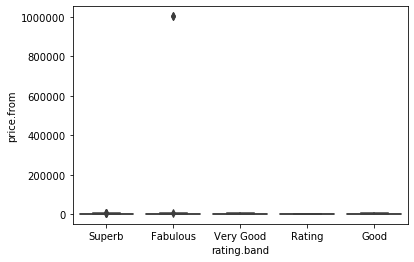

In [46]:
#boxplot rating.band and price
sns.boxplot(x='rating.band', y='price.from', data=df_japan_hostel)

In [47]:
#delete row with price.from that is not reasonable
df_japan_hostel = df_japan_hostel[df_japan_hostel['price.from'] != df_japan_hostel['price.from'].max()]

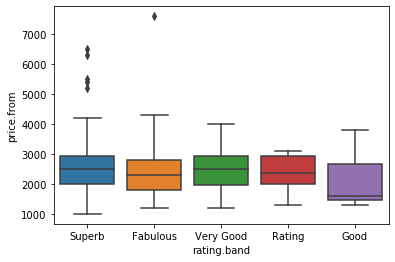

In [48]:
#boxplot rating.band and price 
sns.boxplot(x='rating.band', y='price.from', data=df_japan_hostel)

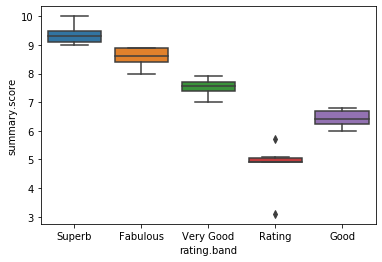

In [25]:
#boxplot rating.band and summary score
sns.boxplot(x='rating.band', y='summary.score', data=df_japan_hostel)

There are very few hostels with rating band 'Rating' and 'Good'

In [26]:
#Check the number of hostels within each rating.band
df_japan_hostel.groupby('rating.band').count()

,hostel.name,City,price.from,Distance,summary.score,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,Longitude,Latitude
rating.band,,,,,,,,,,,,,,
Fabulous,93,93,93,93,93,93,93,93,93,93,93,93,93,93
Good,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Rating,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Superb,172,172,172,172,172,172,172,172,172,172,172,172,172,172
Very Good,18,18,18,18,18,18,18,18,18,18,18,18,18,18


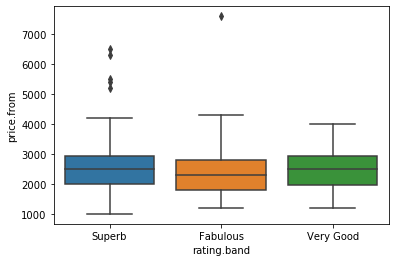

In [49]:
#Drop rows with rating 'Rating' and 'Good'
df_japan_hostel = df_japan_hostel[df_japan_hostel['rating.band'] != 'Good']
df_japan_hostel = df_japan_hostel[df_japan_hostel['rating.band'] != 'Rating']

sns.boxplot(x='rating.band', y='price.from', data=df_japan_hostel)

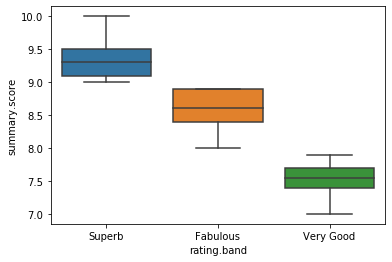

In [28]:
sns.boxplot(x='rating.band', y='summary.score', data=df_japan_hostel)

In [29]:
df_japan_hostel.corr()['price.from'].sort_values()

valueformoney   -0.065935
Distance        -0.036084
Latitude         0.012017
facilities       0.045938
security         0.064348
Longitude        0.072808
location.y       0.084771
atmosphere       0.100524
summary.score    0.102653
staff            0.105473
cleanliness      0.176612
price.from       1.000000
Name: price.from, dtype: float64

In [30]:
df_japan_hostel.corr()['summary.score'].sort_values()

Longitude       -0.134470
Distance        -0.049374
Latitude        -0.045817
price.from       0.102653
location.y       0.501249
security         0.710018
staff            0.732762
atmosphere       0.760614
cleanliness      0.767922
valueformoney    0.777186
facilities       0.803625
summary.score    1.000000
Name: summary.score, dtype: float64

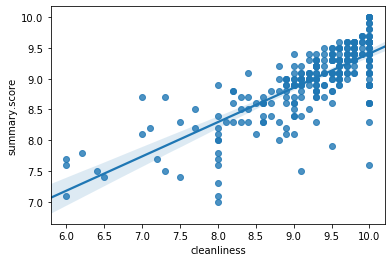

In [31]:
#test regression summary score vs cleanliness
sns.regplot(x="cleanliness", y="summary.score", data=df_japan_hostel)

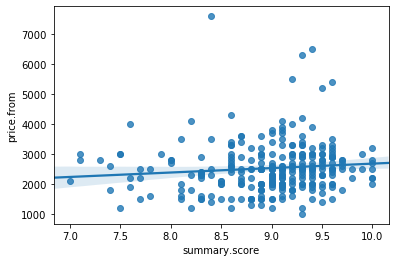

In [33]:
#test regression price vs summary score
sns.regplot(x="summary.score", y="price.from", data=df_japan_hostel)

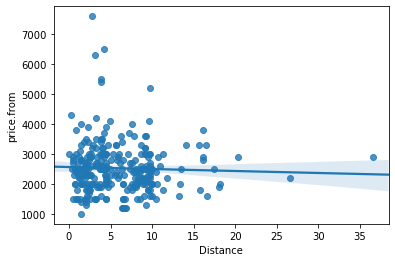

In [34]:
#test regression price vs distance
sns.regplot(x="Distance", y="price.from", data=df_japan_hostel)

In [50]:
#create distance between each hostel and venues
for i in df_venue_focus['Venue Name']:
    venue_lat = float(df_venue_focus['Latitude'][df_venue_focus['Venue Name']==i])
    venue_lng = float(df_venue_focus['Longitude'][df_venue_focus['Venue Name']==i])

    df_japan_hostel[i] = np.sqrt((df_japan_hostel['Latitude'] - venue_lat)**2 + (df_japan_hostel['Longitude'] - venue_lng)**2)
print(df_japan_hostel.shape)
df_japan_hostel.head()

(283, 51)


,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,Longitude,Latitude,Olympic Stadium,Tokyo Metropolitan Gymnasium,Yoyogi National Stadium,Nippon Budokan,Imperial Palace Garden,Tokyo International Forum,Kokugikan Arena,Equestrian Park,Musashino Forest Sport Plaza,Tokyo Stadium,Musashinonomori Park,Ariake Arena,Ariake Gymnastics Centre,Ariake Urban Sports Park,Ariake Tennis Park,Odaiba Marine Park,Shiokaze Park,Aomi Urban Sports Park,Oi Hockey Stadium,Sea Forest Cross-Country Course,Sea Forest Waterway,Kasai Canoe Slalom Centre,Yumenoshima Park Archery Field,Tokyo Aquatics Centre,Tatsumi Water Polo Centre,Makuhari Messe Hall A,Makuhari Messe Hall B,Saitama Super Arena,Asaka Shooting Range,Kasumigaseki Country Club,Enoshima Yacht Harbour,Yokohama Baseball Stadium,Saitama Stadium,International Stadium Yokohama,Olympic Village,IBC/MPC Tokyo International Exhibition Centre (Tokyo Big Sight)
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678,4.317268,4.315490,4.300785,4.355123,4.356561,4.365170,4.398115,4.251467,4.128761,4.131669,4.130815,4.386910,4.381400,4.380932,4.379310,4.363658,4.357911,4.361626,4.336482,4.390345,4.395927,4.445379,4.419810,4.409027,4.412028,4.624624,4.624624,4.291830,4.225781,4.077235,4.017508,4.198477,4.377827,4.175594,4.370369,4.383183
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447,0.065678,0.067347,0.082800,0.027779,0.026962,0.024440,0.015869,0.137220,0.255557,0.252521,0.255117,0.056607,0.062272,0.058455,0.063119,0.068657,0.073958,0.076267,0.107354,0.095408,0.099375,0.092546,0.068472,0.059536,0.064523,0.264174,0.264174,0.246527,0.198437,0.423732,0.494313,0.286681,0.215512,0.253098,0.045511,0.068771
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716,0.077167,0.078443,0.094859,0.038848,0.040818,0.040743,0.018498,0.150555,0.264038,0.261061,0.262945,0.070144,0.076519,0.072797,0.077600,0.084418,0.089953,0.092013,0.123645,0.108648,0.112092,0.097430,0.076237,0.068989,0.073702,0.261518,0.261518,0.238365,0.198711,0.422205,0.510289,0.303073,0.202819,0.268600,0.061302,0.082763
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898,0.097372,0.098462,0.115196,0.059452,0.061923,0.061367,0.031361,0.171279,0.281517,0.278594,0.279894,0.084635,0.091805,0.088318,0.093202,0.102050,0.108024,0.109529,0.142334,0.121772,0.124382,0.099672,0.083150,0.078405,0.082512,0.251782,0.251782,0.237095,0.208631,0.429136,0.531224,0.323410,0.194168,0.289712,0.079341,0.097524
5,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384,0.085809,0.086819,0.103672,0.048264,0.051482,0.052630,0.028173,0.159972,0.269601,0.266673,0.268026,0.081341,0.087973,0.084304,0.089143,0.096413,0.102012,0.103997,0.135761,0.119531,0.122704,0.103728,0.084554,0.078317,0.082815,0.261559,0.261559,0.231741,0.198439,0.420149,0.521674,0.314938,0.192979,0.279581,0.073328,0.094086


In [51]:
#Create a DataFrame of hostels in Tokyo, df_tokyo_hostel, from the df_japan_hostel
df_tokyo_hostel = df_japan_hostel[df_japan_hostel['City'].str.contains('Tokyo')]
print(df_tokyo_hostel.shape)
df_tokyo_hostel.head()

(113, 51)


,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,Longitude,Latitude,Olympic Stadium,Tokyo Metropolitan Gymnasium,Yoyogi National Stadium,Nippon Budokan,Imperial Palace Garden,Tokyo International Forum,Kokugikan Arena,Equestrian Park,Musashino Forest Sport Plaza,Tokyo Stadium,Musashinonomori Park,Ariake Arena,Ariake Gymnastics Centre,Ariake Urban Sports Park,Ariake Tennis Park,Odaiba Marine Park,Shiokaze Park,Aomi Urban Sports Park,Oi Hockey Stadium,Sea Forest Cross-Country Course,Sea Forest Waterway,Kasai Canoe Slalom Centre,Yumenoshima Park Archery Field,Tokyo Aquatics Centre,Tatsumi Water Polo Centre,Makuhari Messe Hall A,Makuhari Messe Hall B,Saitama Super Arena,Asaka Shooting Range,Kasumigaseki Country Club,Enoshima Yacht Harbour,Yokohama Baseball Stadium,Saitama Stadium,International Stadium Yokohama,Olympic Village,IBC/MPC Tokyo International Exhibition Centre (Tokyo Big Sight)
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447,0.065678,0.067347,0.082800,0.027779,0.026962,0.024440,0.015869,0.137220,0.255557,0.252521,0.255117,0.056607,0.062272,0.058455,0.063119,0.068657,0.073958,0.076267,0.107354,0.095408,0.099375,0.092546,0.068472,0.059536,0.064523,0.264174,0.264174,0.246527,0.198437,0.423732,0.494313,0.286681,0.215512,0.253098,0.045511,0.068771
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716,0.077167,0.078443,0.094859,0.038848,0.040818,0.040743,0.018498,0.150555,0.264038,0.261061,0.262945,0.070144,0.076519,0.072797,0.077600,0.084418,0.089953,0.092013,0.123645,0.108648,0.112092,0.097430,0.076237,0.068989,0.073702,0.261518,0.261518,0.238365,0.198711,0.422205,0.510289,0.303073,0.202819,0.268600,0.061302,0.082763
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898,0.097372,0.098462,0.115196,0.059452,0.061923,0.061367,0.031361,0.171279,0.281517,0.278594,0.279894,0.084635,0.091805,0.088318,0.093202,0.102050,0.108024,0.109529,0.142334,0.121772,0.124382,0.099672,0.083150,0.078405,0.082512,0.251782,0.251782,0.237095,0.208631,0.429136,0.531224,0.323410,0.194168,0.289712,0.079341,0.097524
5,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384,0.085809,0.086819,0.103672,0.048264,0.051482,0.052630,0.028173,0.159972,0.269601,0.266673,0.268026,0.081341,0.087973,0.084304,0.089143,0.096413,0.102012,0.103997,0.135761,0.119531,0.122704,0.103728,0.084554,0.078317,0.082815,0.261559,0.261559,0.231741,0.198439,0.420149,0.521674,0.314938,0.192979,0.279581,0.073328,0.094086
6,328 Hostel & Lounge,Tokyo,3300,16.5,9.3,Superb,8.7,9.7,9.3,9.1,9.3,9.7,8.9,139.745467,35.548044,0.133598,0.135742,0.127718,0.145360,0.137543,0.130235,0.156405,0.118674,0.250392,0.247341,0.256817,0.107054,0.099046,0.101745,0.097123,0.085611,0.079459,0.078330,0.045467,0.083941,0.087110,0.145344,0.129964,0.124526,0.124016,0.307603,0.307603,0.365928,0.273358,0.489384,0.360720,0.145991,0.357528,0.143942,0.108138,0.095305


In [52]:
#Try clustering hostels based on distance from Olympic venues
feature = list(df_venue_focus['Venue Name'])
df_hostel_clustering = df_japan_hostel[feature]

# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_hostel_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

# add clustering labels
df_japan_hostel.insert(0, 'Cluster Labels', kmeans.labels_)
df_japan_hostel.head()

,Cluster Labels,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,Longitude,Latitude,Olympic Stadium,Tokyo Metropolitan Gymnasium,Yoyogi National Stadium,Nippon Budokan,Imperial Palace Garden,Tokyo International Forum,Kokugikan Arena,Equestrian Park,Musashino Forest Sport Plaza,Tokyo Stadium,Musashinonomori Park,Ariake Arena,Ariake Gymnastics Centre,Ariake Urban Sports Park,Ariake Tennis Park,Odaiba Marine Park,Shiokaze Park,Aomi Urban Sports Park,Oi Hockey Stadium,Sea Forest Cross-Country Course,Sea Forest Waterway,Kasai Canoe Slalom Centre,Yumenoshima Park Archery Field,Tokyo Aquatics Centre,Tatsumi Water Polo Centre,Makuhari Messe Hall A,Makuhari Messe Hall B,Saitama Super Arena,Asaka Shooting Range,Kasumigaseki Country Club,Enoshima Yacht Harbour,Yokohama Baseball Stadium,Saitama Stadium,International Stadium Yokohama,Olympic Village,IBC/MPC Tokyo International Exhibition Centre (Tokyo Big Sight)
0,0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678,4.317268,4.315490,4.300785,4.355123,4.356561,4.365170,4.398115,4.251467,4.128761,4.131669,4.130815,4.386910,4.381400,4.380932,4.379310,4.363658,4.357911,4.361626,4.336482,4.390345,4.395927,4.445379,4.419810,4.409027,4.412028,4.624624,4.624624,4.291830,4.225781,4.077235,4.017508,4.198477,4.377827,4.175594,4.370369,4.383183
2,1,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447,0.065678,0.067347,0.082800,0.027779,0.026962,0.024440,0.015869,0.137220,0.255557,0.252521,0.255117,0.056607,0.062272,0.058455,0.063119,0.068657,0.073958,0.076267,0.107354,0.095408,0.099375,0.092546,0.068472,0.059536,0.064523,0.264174,0.264174,0.246527,0.198437,0.423732,0.494313,0.286681,0.215512,0.253098,0.045511,0.068771
3,1,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716,0.077167,0.078443,0.094859,0.038848,0.040818,0.040743,0.018498,0.150555,0.264038,0.261061,0.262945,0.070144,0.076519,0.072797,0.077600,0.084418,0.089953,0.092013,0.123645,0.108648,0.112092,0.097430,0.076237,0.068989,0.073702,0.261518,0.261518,0.238365,0.198711,0.422205,0.510289,0.303073,0.202819,0.268600,0.061302,0.082763
4,1,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898,0.097372,0.098462,0.115196,0.059452,0.061923,0.061367,0.031361,0.171279,0.281517,0.278594,0.279894,0.084635,0.091805,0.088318,0.093202,0.102050,0.108024,0.109529,0.142334,0.121772,0.124382,0.099672,0.083150,0.078405,0.082512,0.251782,0.251782,0.237095,0.208631,0.429136,0.531224,0.323410,0.194168,0.289712,0.079341,0.097524
5,1,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384,0.085809,0.086819,0.103672,0.048264,0.051482,0.052630,0.028173,0.159972,0.269601,0.266673,0.268026,0.081341,0.087973,0.084304,0.089143,0.096413,0.102012,0.103997,0.135761,0.119531,0.122704,0.103728,0.084554,0.078317,0.082815,0.261559,0.261559,0.231741,0.198439,0.420149,0.521674,0.314938,0.192979,0.279581,0.073328,0.094086


In [53]:
# create map
venue_colors = ['red','darkred','yellow','orange','coral']
hostel_colors = ['blue','darkblue','indigo','teal','turquoise']

map_clusters = folium.Map(location=[tokyo_lat, tokyo_lng], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_japan_hostel['Latitude'], df_japan_hostel['Longitude'], df_japan_hostel['hostel.name'], df_japan_hostel['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color=hostel_colors[cluster-1],#rainbow[cluster-1],
        fill=True,
        fill_color=hostel_colors[cluster-1],#rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

    
    
    
# set color scheme for the clusters
x_venue = np.arange(kclusters)
ys_venue = [i + x_venue + (i*x_venue)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys_venue)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_venue_focus['Latitude'], df_venue_focus['Longitude'], df_venue_focus['Venue Name'], df_venue_focus['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=venue_colors[cluster-1],#rainbow[cluster-1],
        fill=False,
        fill_color=venue_colors[cluster-1],#rainbow[cluster-1],
        fill_opacity=0.3).add_to(map_clusters)
#    folium.Marker(
#        [lat, lon],
#        popup=label,
#        opacity=0.3,
#        icon = folium.Icon(color='blue')).add_to(map_clusters)#,
    
    
    
map_clusters

In [54]:
#Since there are many hostels locating in cities far from the Olympic venues, I will consider only hostels in Tokyo
feature = list(df_venue_focus['Venue Name'])
df_hostel_clustering = df_tokyo_hostel[feature]

# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_hostel_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

# add clustering labels
df_tokyo_hostel.insert(0, 'Cluster Labels', kmeans.labels_)
df_tokyo_hostel.head()

,Cluster Labels,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,Longitude,Latitude,Olympic Stadium,Tokyo Metropolitan Gymnasium,Yoyogi National Stadium,Nippon Budokan,Imperial Palace Garden,Tokyo International Forum,Kokugikan Arena,Equestrian Park,Musashino Forest Sport Plaza,Tokyo Stadium,Musashinonomori Park,Ariake Arena,Ariake Gymnastics Centre,Ariake Urban Sports Park,Ariake Tennis Park,Odaiba Marine Park,Shiokaze Park,Aomi Urban Sports Park,Oi Hockey Stadium,Sea Forest Cross-Country Course,Sea Forest Waterway,Kasai Canoe Slalom Centre,Yumenoshima Park Archery Field,Tokyo Aquatics Centre,Tatsumi Water Polo Centre,Makuhari Messe Hall A,Makuhari Messe Hall B,Saitama Super Arena,Asaka Shooting Range,Kasumigaseki Country Club,Enoshima Yacht Harbour,Yokohama Baseball Stadium,Saitama Stadium,International Stadium Yokohama,Olympic Village,IBC/MPC Tokyo International Exhibition Centre (Tokyo Big Sight)
2,0,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447,0.065678,0.067347,0.082800,0.027779,0.026962,0.024440,0.015869,0.137220,0.255557,0.252521,0.255117,0.056607,0.062272,0.058455,0.063119,0.068657,0.073958,0.076267,0.107354,0.095408,0.099375,0.092546,0.068472,0.059536,0.064523,0.264174,0.264174,0.246527,0.198437,0.423732,0.494313,0.286681,0.215512,0.253098,0.045511,0.068771
3,3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716,0.077167,0.078443,0.094859,0.038848,0.040818,0.040743,0.018498,0.150555,0.264038,0.261061,0.262945,0.070144,0.076519,0.072797,0.077600,0.084418,0.089953,0.092013,0.123645,0.108648,0.112092,0.097430,0.076237,0.068989,0.073702,0.261518,0.261518,0.238365,0.198711,0.422205,0.510289,0.303073,0.202819,0.268600,0.061302,0.082763
4,3,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898,0.097372,0.098462,0.115196,0.059452,0.061923,0.061367,0.031361,0.171279,0.281517,0.278594,0.279894,0.084635,0.091805,0.088318,0.093202,0.102050,0.108024,0.109529,0.142334,0.121772,0.124382,0.099672,0.083150,0.078405,0.082512,0.251782,0.251782,0.237095,0.208631,0.429136,0.531224,0.323410,0.194168,0.289712,0.079341,0.097524
5,3,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384,0.085809,0.086819,0.103672,0.048264,0.051482,0.052630,0.028173,0.159972,0.269601,0.266673,0.268026,0.081341,0.087973,0.084304,0.089143,0.096413,0.102012,0.103997,0.135761,0.119531,0.122704,0.103728,0.084554,0.078317,0.082815,0.261559,0.261559,0.231741,0.198439,0.420149,0.521674,0.314938,0.192979,0.279581,0.073328,0.094086
6,2,328 Hostel & Lounge,Tokyo,3300,16.5,9.3,Superb,8.7,9.7,9.3,9.1,9.3,9.7,8.9,139.745467,35.548044,0.133598,0.135742,0.127718,0.145360,0.137543,0.130235,0.156405,0.118674,0.250392,0.247341,0.256817,0.107054,0.099046,0.101745,0.097123,0.085611,0.079459,0.078330,0.045467,0.083941,0.087110,0.145344,0.129964,0.124526,0.124016,0.307603,0.307603,0.365928,0.273358,0.489384,0.360720,0.145991,0.357528,0.143942,0.108138,0.095305


In [55]:
# create map
map_clusters = folium.Map(location=[tokyo_lat, tokyo_lng], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_tokyo_hostel['Latitude'], df_tokyo_hostel['Longitude'], df_tokyo_hostel['hostel.name'], df_tokyo_hostel['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color=hostel_colors[cluster-1],#rainbow[cluster-1],
        fill=True,
        fill_color=hostel_colors[cluster-1],#rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

    
    
    
# set color scheme for the clusters
x_venue = np.arange(kclusters)
ys_venue = [i + x_venue + (i*x_venue)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys_venue)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_venue_focus['Latitude'], df_venue_focus['Longitude'], df_venue_focus['Venue Name'], df_venue_focus['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        opacity = 0.8,
        popup=label,
        color=venue_colors[cluster-1],#rainbow[cluster-1],
        fill=False,
        fill_color=venue_colors[cluster-1],#rainbow[cluster-1],
        fill_opacity=0.1).add_to(map_clusters)
    
    
    
    
map_clusters

In [56]:
df_tokyo_hostel.groupby(['Cluster Labels']).count()

,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,Longitude,Latitude,Olympic Stadium,Tokyo Metropolitan Gymnasium,Yoyogi National Stadium,Nippon Budokan,Imperial Palace Garden,Tokyo International Forum,Kokugikan Arena,Equestrian Park,Musashino Forest Sport Plaza,Tokyo Stadium,Musashinonomori Park,Ariake Arena,Ariake Gymnastics Centre,Ariake Urban Sports Park,Ariake Tennis Park,Odaiba Marine Park,Shiokaze Park,Aomi Urban Sports Park,Oi Hockey Stadium,Sea Forest Cross-Country Course,Sea Forest Waterway,Kasai Canoe Slalom Centre,Yumenoshima Park Archery Field,Tokyo Aquatics Centre,Tatsumi Water Polo Centre,Makuhari Messe Hall A,Makuhari Messe Hall B,Saitama Super Arena,Asaka Shooting Range,Kasumigaseki Country Club,Enoshima Yacht Harbour,Yokohama Baseball Stadium,Saitama Stadium,International Stadium Yokohama,Olympic Village,IBC/MPC Tokyo International Exhibition Centre (Tokyo Big Sight)
Cluster Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
1,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
4,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [57]:
#Try clustering based on new criterion - the hostels with shorter distance will have higher points
df_tokyo_hostel_recal = df_tokyo_hostel.drop(['Cluster Labels'],1)
for i in feature:
    df_tokyo_hostel[i] = (df_tokyo_hostel[i].max()-df_tokyo_hostel[i])/(df_tokyo_hostel[i].max()-df_tokyo_hostel[i].min())

df_tokyo_hostel_recal.head()

/Users/noppadonsakulsom/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,Longitude,Latitude,Olympic Stadium,Tokyo Metropolitan Gymnasium,Yoyogi National Stadium,Nippon Budokan,Imperial Palace Garden,Tokyo International Forum,Kokugikan Arena,Equestrian Park,Musashino Forest Sport Plaza,Tokyo Stadium,Musashinonomori Park,Ariake Arena,Ariake Gymnastics Centre,Ariake Urban Sports Park,Ariake Tennis Park,Odaiba Marine Park,Shiokaze Park,Aomi Urban Sports Park,Oi Hockey Stadium,Sea Forest Cross-Country Course,Sea Forest Waterway,Kasai Canoe Slalom Centre,Yumenoshima Park Archery Field,Tokyo Aquatics Centre,Tatsumi Water Polo Centre,Makuhari Messe Hall A,Makuhari Messe Hall B,Saitama Super Arena,Asaka Shooting Range,Kasumigaseki Country Club,Enoshima Yacht Harbour,Yokohama Baseball Stadium,Saitama Stadium,International Stadium Yokohama,Olympic Village,IBC/MPC Tokyo International Exhibition Centre (Tokyo Big Sight)
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447,0.065678,0.067347,0.082800,0.027779,0.026962,0.024440,0.015869,0.137220,0.255557,0.252521,0.255117,0.056607,0.062272,0.058455,0.063119,0.068657,0.073958,0.076267,0.107354,0.095408,0.099375,0.092546,0.068472,0.059536,0.064523,0.264174,0.264174,0.246527,0.198437,0.423732,0.494313,0.286681,0.215512,0.253098,0.045511,0.068771
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716,0.077167,0.078443,0.094859,0.038848,0.040818,0.040743,0.018498,0.150555,0.264038,0.261061,0.262945,0.070144,0.076519,0.072797,0.077600,0.084418,0.089953,0.092013,0.123645,0.108648,0.112092,0.097430,0.076237,0.068989,0.073702,0.261518,0.261518,0.238365,0.198711,0.422205,0.510289,0.303073,0.202819,0.268600,0.061302,0.082763
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898,0.097372,0.098462,0.115196,0.059452,0.061923,0.061367,0.031361,0.171279,0.281517,0.278594,0.279894,0.084635,0.091805,0.088318,0.093202,0.102050,0.108024,0.109529,0.142334,0.121772,0.124382,0.099672,0.083150,0.078405,0.082512,0.251782,0.251782,0.237095,0.208631,0.429136,0.531224,0.323410,0.194168,0.289712,0.079341,0.097524
5,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384,0.085809,0.086819,0.103672,0.048264,0.051482,0.052630,0.028173,0.159972,0.269601,0.266673,0.268026,0.081341,0.087973,0.084304,0.089143,0.096413,0.102012,0.103997,0.135761,0.119531,0.122704,0.103728,0.084554,0.078317,0.082815,0.261559,0.261559,0.231741,0.198439,0.420149,0.521674,0.314938,0.192979,0.279581,0.073328,0.094086
6,328 Hostel & Lounge,Tokyo,3300,16.5,9.3,Superb,8.7,9.7,9.3,9.1,9.3,9.7,8.9,139.745467,35.548044,0.133598,0.135742,0.127718,0.145360,0.137543,0.130235,0.156405,0.118674,0.250392,0.247341,0.256817,0.107054,0.099046,0.101745,0.097123,0.085611,0.079459,0.078330,0.045467,0.083941,0.087110,0.145344,0.129964,0.124526,0.124016,0.307603,0.307603,0.365928,0.273358,0.489384,0.360720,0.145991,0.357528,0.143942,0.108138,0.095305


In [58]:
df_hostel_clustering = df_tokyo_hostel_recal[feature]

# set number of clusters
kclusters = 5
hostelcluster = kclusters

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_hostel_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

# add clustering labels
df_tokyo_hostel_recal.insert(0, 'Cluster Labels', kmeans.labels_)
df_tokyo_hostel_recal.head()

,Cluster Labels,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,Longitude,Latitude,Olympic Stadium,Tokyo Metropolitan Gymnasium,Yoyogi National Stadium,Nippon Budokan,Imperial Palace Garden,Tokyo International Forum,Kokugikan Arena,Equestrian Park,Musashino Forest Sport Plaza,Tokyo Stadium,Musashinonomori Park,Ariake Arena,Ariake Gymnastics Centre,Ariake Urban Sports Park,Ariake Tennis Park,Odaiba Marine Park,Shiokaze Park,Aomi Urban Sports Park,Oi Hockey Stadium,Sea Forest Cross-Country Course,Sea Forest Waterway,Kasai Canoe Slalom Centre,Yumenoshima Park Archery Field,Tokyo Aquatics Centre,Tatsumi Water Polo Centre,Makuhari Messe Hall A,Makuhari Messe Hall B,Saitama Super Arena,Asaka Shooting Range,Kasumigaseki Country Club,Enoshima Yacht Harbour,Yokohama Baseball Stadium,Saitama Stadium,International Stadium Yokohama,Olympic Village,IBC/MPC Tokyo International Exhibition Centre (Tokyo Big Sight)
2,0,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447,0.065678,0.067347,0.082800,0.027779,0.026962,0.024440,0.015869,0.137220,0.255557,0.252521,0.255117,0.056607,0.062272,0.058455,0.063119,0.068657,0.073958,0.076267,0.107354,0.095408,0.099375,0.092546,0.068472,0.059536,0.064523,0.264174,0.264174,0.246527,0.198437,0.423732,0.494313,0.286681,0.215512,0.253098,0.045511,0.068771
3,3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716,0.077167,0.078443,0.094859,0.038848,0.040818,0.040743,0.018498,0.150555,0.264038,0.261061,0.262945,0.070144,0.076519,0.072797,0.077600,0.084418,0.089953,0.092013,0.123645,0.108648,0.112092,0.097430,0.076237,0.068989,0.073702,0.261518,0.261518,0.238365,0.198711,0.422205,0.510289,0.303073,0.202819,0.268600,0.061302,0.082763
4,3,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898,0.097372,0.098462,0.115196,0.059452,0.061923,0.061367,0.031361,0.171279,0.281517,0.278594,0.279894,0.084635,0.091805,0.088318,0.093202,0.102050,0.108024,0.109529,0.142334,0.121772,0.124382,0.099672,0.083150,0.078405,0.082512,0.251782,0.251782,0.237095,0.208631,0.429136,0.531224,0.323410,0.194168,0.289712,0.079341,0.097524
5,3,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384,0.085809,0.086819,0.103672,0.048264,0.051482,0.052630,0.028173,0.159972,0.269601,0.266673,0.268026,0.081341,0.087973,0.084304,0.089143,0.096413,0.102012,0.103997,0.135761,0.119531,0.122704,0.103728,0.084554,0.078317,0.082815,0.261559,0.261559,0.231741,0.198439,0.420149,0.521674,0.314938,0.192979,0.279581,0.073328,0.094086
6,2,328 Hostel & Lounge,Tokyo,3300,16.5,9.3,Superb,8.7,9.7,9.3,9.1,9.3,9.7,8.9,139.745467,35.548044,0.133598,0.135742,0.127718,0.145360,0.137543,0.130235,0.156405,0.118674,0.250392,0.247341,0.256817,0.107054,0.099046,0.101745,0.097123,0.085611,0.079459,0.078330,0.045467,0.083941,0.087110,0.145344,0.129964,0.124526,0.124016,0.307603,0.307603,0.365928,0.273358,0.489384,0.360720,0.145991,0.357528,0.143942,0.108138,0.095305


In [59]:
# create map
map_clusters = folium.Map(location=[tokyo_lat, tokyo_lng], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_tokyo_hostel_recal['Latitude'], df_tokyo_hostel_recal['Longitude'], df_tokyo_hostel_recal['hostel.name'], df_tokyo_hostel_recal['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color=hostel_colors[cluster-1],#rainbow[cluster-1],
        fill=True,
        fill_color=hostel_colors[cluster-1],#rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

    
    
    
# set color scheme for the clusters
x_venue = np.arange(kclusters)
ys_venue = [i + x_venue + (i*x_venue)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys_venue)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_venue_focus['Latitude'], df_venue_focus['Longitude'], df_venue_focus['Venue Name'], df_venue_focus['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        opacity = 0.8,
        popup=label,
        color=venue_colors[cluster-1],#rainbow[cluster-1],
        fill=True,
        fill_color=venue_colors[cluster-1],#rainbow[cluster-1],
        fill_opacity=0.1).add_to(map_clusters)
    
    
    
    
map_clusters

In [60]:
df_tokyo_hostel_recal.groupby(['Cluster Labels']).count()

,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,Longitude,Latitude,Olympic Stadium,Tokyo Metropolitan Gymnasium,Yoyogi National Stadium,Nippon Budokan,Imperial Palace Garden,Tokyo International Forum,Kokugikan Arena,Equestrian Park,Musashino Forest Sport Plaza,Tokyo Stadium,Musashinonomori Park,Ariake Arena,Ariake Gymnastics Centre,Ariake Urban Sports Park,Ariake Tennis Park,Odaiba Marine Park,Shiokaze Park,Aomi Urban Sports Park,Oi Hockey Stadium,Sea Forest Cross-Country Course,Sea Forest Waterway,Kasai Canoe Slalom Centre,Yumenoshima Park Archery Field,Tokyo Aquatics Centre,Tatsumi Water Polo Centre,Makuhari Messe Hall A,Makuhari Messe Hall B,Saitama Super Arena,Asaka Shooting Range,Kasumigaseki Country Club,Enoshima Yacht Harbour,Yokohama Baseball Stadium,Saitama Stadium,International Stadium Yokohama,Olympic Village,IBC/MPC Tokyo International Exhibition Centre (Tokyo Big Sight)
Cluster Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
1,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
4,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [61]:
df_cluster_venue = df_venue_focus.groupby(['Cluster Labels']).mean()
df_cluster_venue

,Latitude,Longitude
Cluster Labels,,
0,35.783162,139.560468
1,35.646876,140.036761
2,35.418476,139.577502
3,35.646498,139.774091


In [62]:
df_tokyo_hostel_select = df_tokyo_hostel_recal[['Cluster Labels','hostel.name','City','price.from','summary.score','rating.band','Latitude','Longitude']]

print(df_tokyo_hostel_select.shape)
df_tokyo_hostel_select.head()

(113, 8)


,Cluster Labels,hostel.name,City,price.from,summary.score,rating.band,Latitude,Longitude
2,0,&And Hostel Akihabara,Tokyo,3600,8.7,Fabulous,35.697447,139.777472
3,3,&And Hostel Ueno,Tokyo,2600,7.4,Very Good,35.712716,139.783667
4,3,&And Hostel-Asakusa North-,Tokyo,1500,9.4,Superb,35.727898,139.798371
5,3,1night1980hostel Tokyo,Tokyo,2100,7.0,Very Good,35.724384,139.786950
6,2,328 Hostel & Lounge,Tokyo,3300,9.3,Superb,35.548044,139.745467


In [63]:
for i in range(len(df_cluster_venue)):
    venue_lat = df_cluster_venue.loc[i]['Latitude']
    venue_lng = df_cluster_venue.loc[i]['Longitude']
   
    df_tokyo_hostel_select[i] = np.sqrt((df_tokyo_hostel_select['Latitude'] - venue_lat)**2 + (df_tokyo_hostel_select['Longitude'] - venue_lng)**2) 

df_tokyo_hostel_select.head()


/Users/noppadonsakulsom/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Cluster Labels,hostel.name,City,price.from,summary.score,rating.band,Latitude,Longitude,0,1,2,3
2,0,&And Hostel Akihabara,Tokyo,3600,8.7,Fabulous,35.697447,139.777472,0.233319,0.264174,0.343239,0.051062
3,3,&And Hostel Ueno,Tokyo,2600,7.4,Very Good,35.712716,139.783667,0.234052,0.261518,0.359279,0.066907
4,3,&And Hostel-Asakusa North-,Tokyo,1500,9.4,Superb,35.727898,139.798371,0.244237,0.251782,0.380165,0.084944
5,3,1night1980hostel Tokyo,Tokyo,2100,7.0,Very Good,35.724384,139.786950,0.233984,0.261559,0.370740,0.078941
6,2,328 Hostel & Lounge,Tokyo,3300,9.3,Superb,35.548044,139.745467,0.299174,0.307603,0.212133,0.102530


In [64]:
for i in range(len(df_cluster_venue)):
    df_tokyo_hostel_select['rating.'+str(i)] = df_tokyo_hostel_select['summary.score']/df_tokyo_hostel_select[i]
df_tokyo_hostel_select['rating.summary'] = df_tokyo_hostel_select['rating.0']+df_tokyo_hostel_select['rating.1']+df_tokyo_hostel_select['rating.2']+df_tokyo_hostel_select['rating.3']
df_tokyo_hostel_select.head()

/Users/noppadonsakulsom/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/noppadonsakulsom/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Cluster Labels,hostel.name,City,price.from,summary.score,rating.band,Latitude,Longitude,0,1,2,3,rating.0,rating.1,rating.2,rating.3,rating.summary
2,0,&And Hostel Akihabara,Tokyo,3600,8.7,Fabulous,35.697447,139.777472,0.233319,0.264174,0.343239,0.051062,37.288021,32.932809,25.346741,170.382500,265.950071
3,3,&And Hostel Ueno,Tokyo,2600,7.4,Very Good,35.712716,139.783667,0.234052,0.261518,0.359279,0.066907,31.616940,28.296370,20.596813,110.601269,191.111391
4,3,&And Hostel-Asakusa North-,Tokyo,1500,9.4,Superb,35.727898,139.798371,0.244237,0.251782,0.380165,0.084944,38.487168,37.333864,24.726120,110.661029,211.208181
5,3,1night1980hostel Tokyo,Tokyo,2100,7.0,Very Good,35.724384,139.786950,0.233984,0.261559,0.370740,0.078941,29.916526,26.762611,18.881148,88.674339,164.234624
6,2,328 Hostel & Lounge,Tokyo,3300,9.3,Superb,35.548044,139.745467,0.299174,0.307603,0.212133,0.102530,31.085603,30.233734,43.840493,90.704731,195.864563


In [65]:
df_tokyo_hostel_select[['rating.0','rating.1','rating.2','rating.3','rating.summary']].describe()

,rating.0,rating.1,rating.2,rating.3,rating.summary
count,113.000000,113.000000,113.000000,113.000000,113.000000
mean,40.111926,32.578765,26.725420,138.491617,237.907728
std,8.007749,4.951231,5.422848,56.351647,56.762233
min,26.009909,17.276351,18.881148,43.467759,147.867528
25%,36.138768,29.175259,24.488763,100.740373,199.805578
50%,38.068374,33.575034,25.540973,129.983487,229.439145
75%,42.538655,35.993788,27.595111,162.899313,259.615617
max,67.523947,46.902956,59.043662,377.769577,477.802727


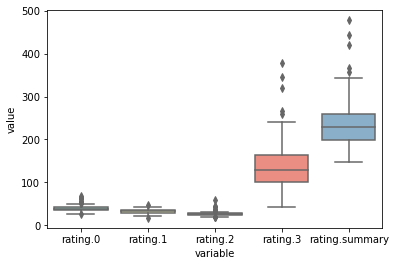

In [66]:
sns.boxplot(x="variable", y="value", palette="Set3",data=pd.melt(df_tokyo_hostel_select[['rating.0','rating.1','rating.2','rating.3','rating.summary']]))

In [67]:
df_tokyo_hostel_select = df_tokyo_hostel_select.sort_values(by=['rating.summary'], ascending=False)
df_tokyo_hostel_select

,Cluster Labels,hostel.name,City,price.from,summary.score,rating.band,Latitude,Longitude,0,1,2,3,rating.0,rating.1,rating.2,rating.3,rating.summary
313,0,The Prime Pod Ginza Tokyo,Tokyo,3700,9.0,Superb,35.669269,139.767087,0.235930,0.270602,0.314388,0.023824,38.146910,33.259210,28.627030,377.769577,477.802727
183,0,Imano Tokyo Ginza Hostel,Tokyo,2700,8.9,Fabulous,35.672306,139.772906,0.239622,0.265078,0.320332,0.025835,37.141853,33.575034,27.783706,344.489631,442.990225
334,0,Wise Owl Hostels Tokyo,Tokyo,2000,9.1,Superb,35.674781,139.777275,0.242387,0.260982,0.324964,0.028462,37.543261,34.868265,28.003128,319.729874,420.144528
241,0,Oakhostel Cabin,Tokyo,2100,9.0,Superb,35.678055,139.785988,0.248810,0.252704,0.332938,0.033725,36.172120,35.614842,27.032038,266.861853,365.680853
341,0,Zabutton Hostel,Tokyo,2900,8.6,Fabulous,35.655470,139.742116,0.222038,0.294770,0.288555,0.033210,38.732039,29.175259,29.803669,258.957259,356.668226
227,0,Lyuro Tokyo Kiyosumi -The Share Hotels-,Tokyo,3200,9.4,Superb,35.681217,139.792066,0.253042,0.247093,0.339221,0.039096,37.148041,38.042323,27.710570,240.431631,343.332565
235,0,Nihonbashi Muromachi BAY HOTEL,Tokyo,4000,9.2,Superb,35.687297,139.775679,0.235597,0.264192,0.333975,0.040831,39.049785,34.823152,27.546960,225.321681,326.741579
99,0,Guest House Shinagawa-shuku Tokyo,Tokyo,3300,9.2,Superb,35.621779,139.740358,0.241670,0.297463,0.260489,0.041820,38.068374,30.928167,35.318198,219.990051,324.304790
136,0,hostel DEN,Tokyo,2400,9.4,Superb,35.691032,139.776697,0.235037,0.263786,0.337587,0.044610,39.993619,35.634909,27.844657,210.715755,314.188939
198,0,Kaisu Hostel,Tokyo,3900,9.4,Superb,35.669916,139.734537,0.207664,0.303101,0.296449,0.045967,45.265348,31.012770,31.708629,204.495531,312.482277


In [68]:
for i in range(len(df_cluster_venue)):
    max_rating = df_tokyo_hostel_select['rating.'+str(i)].max()
    df_tokyo_hostel_select['rating.'+str(i)] = df_tokyo_hostel_select['rating.'+str(i)]/max_rating

df_tokyo_hostel_select['rating.summary'] = (df_tokyo_hostel_select['rating.0']+df_tokyo_hostel_select['rating.1']+df_tokyo_hostel_select['rating.2']+df_tokyo_hostel_select['rating.3'])/4
df_tokyo_hostel_select[['rating.0','rating.1','rating.2','rating.3','rating.summary']].describe()

,rating.0,rating.1,rating.2,rating.3,rating.summary
count,113.000000,113.000000,113.000000,113.000000,113.000000
mean,0.594040,0.694599,0.452638,0.366603,0.526970
std,0.118591,0.105563,0.091845,0.149169,0.050405
min,0.385195,0.368342,0.319783,0.115064,0.392040
25%,0.535199,0.622035,0.414757,0.266671,0.504305
50%,0.563776,0.715840,0.432578,0.344081,0.525709
75%,0.629979,0.767410,0.467368,0.431213,0.550032
max,1.000000,1.000000,1.000000,1.000000,0.689723


In [69]:
df_tokyo_hostel_select = df_tokyo_hostel_select.sort_values(by=['rating.summary'], ascending=False)
df_tokyo_hostel_select

,Cluster Labels,hostel.name,City,price.from,summary.score,rating.band,Latitude,Longitude,0,1,2,3,rating.0,rating.1,rating.2,rating.3,rating.summary
313,0,The Prime Pod Ginza Tokyo,Tokyo,3700,9.0,Superb,35.669269,139.767087,0.235930,0.270602,0.314388,0.023824,0.564939,0.709107,0.484845,1.000000,0.689723
183,0,Imano Tokyo Ginza Hostel,Tokyo,2700,8.9,Fabulous,35.672306,139.772906,0.239622,0.265078,0.320332,0.025835,0.550055,0.715840,0.470562,0.911904,0.662090
334,0,Wise Owl Hostels Tokyo,Tokyo,2000,9.1,Superb,35.674781,139.777275,0.242387,0.260982,0.324964,0.028462,0.555999,0.743413,0.474278,0.846362,0.655013
227,0,Lyuro Tokyo Kiyosumi -The Share Hotels-,Tokyo,3200,9.4,Superb,35.681217,139.792066,0.253042,0.247093,0.339221,0.039096,0.550146,0.811086,0.469323,0.636450,0.616751
241,0,Oakhostel Cabin,Tokyo,2100,9.0,Superb,35.678055,139.785988,0.248810,0.252704,0.332938,0.033725,0.535693,0.759330,0.457831,0.706414,0.614817
12,0,Akihabara Hotel 3000,Tokyo,2200,10.0,Superb,35.697490,139.779382,0.235080,0.262309,0.344390,0.051266,0.629979,0.812807,0.491786,0.516346,0.612729
198,0,Kaisu Hostel,Tokyo,3900,9.4,Superb,35.669916,139.734537,0.207664,0.303101,0.296449,0.045967,0.670360,0.661211,0.537037,0.541323,0.602483
99,0,Guest House Shinagawa-shuku Tokyo,Tokyo,3300,9.2,Superb,35.621779,139.740358,0.241670,0.297463,0.260489,0.041820,0.563776,0.659408,0.598171,0.582339,0.600923
341,0,Zabutton Hostel,Tokyo,2900,8.6,Fabulous,35.655470,139.742116,0.222038,0.294770,0.288555,0.033210,0.573604,0.622035,0.504773,0.685490,0.596476
235,0,Nihonbashi Muromachi BAY HOTEL,Tokyo,4000,9.2,Superb,35.687297,139.775679,0.235597,0.264192,0.333975,0.040831,0.578310,0.742451,0.466552,0.596453,0.595942


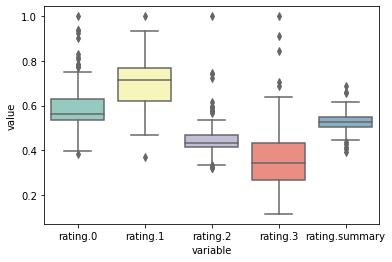

In [70]:
sns.boxplot(x="variable", y="value", palette="Set3",data=pd.melt(df_tokyo_hostel_select[['rating.0','rating.1','rating.2','rating.3','rating.summary']]))

In [71]:
#choose candidate hostels from each hostel cluster based on the rating of target venue cluster
top_number = 5
df_hostel0 = df_tokyo_hostel_select[df_tokyo_hostel_select['Cluster Labels']==0].sort_values(by=['rating.3'], ascending=False).head(top_number)
df_hostel1 = df_tokyo_hostel_select[df_tokyo_hostel_select['Cluster Labels']==1].sort_values(by=['rating.0'], ascending=False).head(top_number)
df_hostel2 = df_tokyo_hostel_select[df_tokyo_hostel_select['Cluster Labels']==2].sort_values(by=['rating.2'], ascending=False).head(top_number)
df_hostel3 = df_tokyo_hostel_select[df_tokyo_hostel_select['Cluster Labels']==3].sort_values(by=['rating.1'], ascending=False).head(top_number)
df_hostel4 = df_tokyo_hostel_select[df_tokyo_hostel_select['Cluster Labels']==4].sort_values(by=['rating.1'], ascending=False).head(top_number)
df_hostelAll = df_tokyo_hostel_select.sort_values(by=['rating.summary'], ascending=False).head(top_number*2)
df_top_hostel = pd.concat([df_hostel0,df_hostel1,df_hostel2,df_hostel3,df_hostel4])
#df_top_hostel = df_hostelAll.append([df_hostel0,df_hostel1])
df_top_hostel = df_top_hostel.sort_values(by=['rating.summary'], ascending=False)
df_top_hostel.head()

,Cluster Labels,hostel.name,City,price.from,summary.score,rating.band,Latitude,Longitude,0,1,2,3,rating.0,rating.1,rating.2,rating.3,rating.summary
313,0,The Prime Pod Ginza Tokyo,Tokyo,3700,9.0,Superb,35.669269,139.767087,0.235930,0.270602,0.314388,0.023824,0.564939,0.709107,0.484845,1.000000,0.689723
183,0,Imano Tokyo Ginza Hostel,Tokyo,2700,8.9,Fabulous,35.672306,139.772906,0.239622,0.265078,0.320332,0.025835,0.550055,0.715840,0.470562,0.911904,0.662090
334,0,Wise Owl Hostels Tokyo,Tokyo,2000,9.1,Superb,35.674781,139.777275,0.242387,0.260982,0.324964,0.028462,0.555999,0.743413,0.474278,0.846362,0.655013
241,0,Oakhostel Cabin,Tokyo,2100,9.0,Superb,35.678055,139.785988,0.248810,0.252704,0.332938,0.033725,0.535693,0.759330,0.457831,0.706414,0.614817
341,0,Zabutton Hostel,Tokyo,2900,8.6,Fabulous,35.655470,139.742116,0.222038,0.294770,0.288555,0.033210,0.573604,0.622035,0.504773,0.685490,0.596476


In [72]:
df_hostel0 = df_hostel0.sort_values(by=['rating.3'], ascending=False)
df_hostel0[['Cluster Labels','hostel.name','summary.score','rating.0','rating.1','rating.2','rating.3','rating.summary']]

,Cluster Labels,hostel.name,summary.score,rating.0,rating.1,rating.2,rating.3,rating.summary
313,0,The Prime Pod Ginza Tokyo,9.0,0.564939,0.709107,0.484845,1.000000,0.689723
183,0,Imano Tokyo Ginza Hostel,8.9,0.550055,0.715840,0.470562,0.911904,0.662090
334,0,Wise Owl Hostels Tokyo,9.1,0.555999,0.743413,0.474278,0.846362,0.655013
241,0,Oakhostel Cabin,9.0,0.535693,0.759330,0.457831,0.706414,0.614817
341,0,Zabutton Hostel,8.6,0.573604,0.622035,0.504773,0.685490,0.596476


In [73]:
df_hostel1 = df_hostel1.sort_values(by=['rating.0'], ascending=False)
df_hostel1[['Cluster Labels','hostel.name','summary.score','rating.0','rating.1','rating.2','rating.3','rating.summary']]

,Cluster Labels,hostel.name,summary.score,rating.0,rating.1,rating.2,rating.3,rating.summary
338,1,YADOYA Guesthouse Orange,8.9,1.000000,0.507561,0.499411,0.192863,0.549959
318,1,Tokyo Hostel Fuji,9.2,0.937420,0.536915,0.535552,0.221411,0.557824
288,1,Sheena and Ippei,9.1,0.937145,0.549544,0.467368,0.210360,0.541104
123,1,Hiromas Inn Chitose-Karasuyama,7.5,0.926229,0.368342,0.500094,0.115064,0.477432
337,1,YADOYA Guesthouse Green,8.2,0.904379,0.468874,0.465229,0.180818,0.504825


In [74]:
df_hostel2 = df_hostel2.sort_values(by=['rating.2'], ascending=False)
df_hostel2[['Cluster Labels','hostel.name','summary.score','rating.0','rating.1','rating.2','rating.3','rating.summary']]

,Cluster Labels,hostel.name,summary.score,rating.0,rating.1,rating.2,rating.3,rating.summary
174,2,Hotel&Hostel On the Marks Tokyo Kawasaki,9.6,0.488515,0.570450,1.000000,0.179767,0.559683
113,2,Guesthouse Sensu,9.3,0.471949,0.638370,0.744108,0.248991,0.525855
6,2,328 Hostel & Lounge,9.3,0.460364,0.644602,0.742510,0.240106,0.521895
29,2,Beagle Tokyo Hostel & Apartments,9.0,0.452520,0.617004,0.725153,0.234667,0.507336
17,2,ARTnSHELTER,8.3,0.482110,0.594385,0.566369,0.414587,0.514363


In [75]:
df_hostel3 = df_hostel3.sort_values(by=['rating.1'], ascending=False)
df_hostel3[['Cluster Labels','hostel.name','summary.score','rating.0','rating.1','rating.2','rating.3','rating.summary']]

,Cluster Labels,hostel.name,summary.score,rating.0,rating.1,rating.2,rating.3,rating.summary
134,3,Hostel Chapter Two Tokyo,10.0,0.597156,0.861281,0.464660,0.395509,0.579652
243,3,Oakhostel Sakura,9.2,0.512629,0.854104,0.416465,0.331422,0.528655
104,3,Guesthouse Fete,9.4,0.553979,0.818620,0.443721,0.414993,0.557828
204,3,Khaosan Tokyo Origami,9.5,0.571552,0.812605,0.434590,0.341573,0.540080
186,3,Iza Tokyo Asakusa Guesthouse,9.3,0.549219,0.809707,0.433086,0.377144,0.542289


In [76]:
df_hostel4 = df_hostel4.sort_values(by=['rating.1'], ascending=False)
df_hostel4[['Cluster Labels','hostel.name','summary.score','rating.0','rating.1','rating.2','rating.3','rating.summary']]

,Cluster Labels,hostel.name,summary.score,rating.0,rating.1,rating.2,rating.3,rating.summary
339,4,YAWP! backpackers,9.3,0.443987,1.000000,0.354952,0.172517,0.492864
64,4,Edo Tokyo Hostel,8.1,0.385195,0.933059,0.333982,0.191960,0.461049
191,4,J's Backpackers,8.3,0.403929,0.884304,0.324380,0.166055,0.444667
65,4,Emblem Hostel Nishiarai,9.3,0.596743,0.712073,0.376441,0.185363,0.467655
109,4,Guesthouse Kagaribi,8.3,0.518399,0.671082,0.351249,0.200476,0.435301


In [77]:
df_hostelAll = df_hostelAll.sort_values(by=['rating.summary'], ascending=False)
df_hostelAll[['Cluster Labels','hostel.name','summary.score','rating.0','rating.1','rating.2','rating.3','rating.summary']]

,Cluster Labels,hostel.name,summary.score,rating.0,rating.1,rating.2,rating.3,rating.summary
313,0,The Prime Pod Ginza Tokyo,9.0,0.564939,0.709107,0.484845,1.000000,0.689723
183,0,Imano Tokyo Ginza Hostel,8.9,0.550055,0.715840,0.470562,0.911904,0.662090
334,0,Wise Owl Hostels Tokyo,9.1,0.555999,0.743413,0.474278,0.846362,0.655013
227,0,Lyuro Tokyo Kiyosumi -The Share Hotels-,9.4,0.550146,0.811086,0.469323,0.636450,0.616751
241,0,Oakhostel Cabin,9.0,0.535693,0.759330,0.457831,0.706414,0.614817
12,0,Akihabara Hotel 3000,10.0,0.629979,0.812807,0.491786,0.516346,0.612729
198,0,Kaisu Hostel,9.4,0.670360,0.661211,0.537037,0.541323,0.602483
99,0,Guest House Shinagawa-shuku Tokyo,9.2,0.563776,0.659408,0.598171,0.582339,0.600923
341,0,Zabutton Hostel,8.6,0.573604,0.622035,0.504773,0.685490,0.596476
235,0,Nihonbashi Muromachi BAY HOTEL,9.2,0.578310,0.742451,0.466552,0.596453,0.595942


In [78]:
df_tokyo_checkin.head()

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
0,1541,4f0fd5a8e4b03856eeb6c8cb,4bf58dd8d48988d10c951735,Cosmetics Shop,35.705101,139.619590,540,Tue Apr 03 18:17:18 +0000 2012
1,868,4b7b884ff964a5207d662fe3,4bf58dd8d48988d1d1941735,Ramen / Noodle House,35.715581,139.800317,540,Tue Apr 03 18:22:04 +0000 2012
2,114,4c16fdda96040f477cc473a5,4d954b0ea243a5684a65b473,Convenience Store,35.714542,139.480065,540,Tue Apr 03 19:12:07 +0000 2012
3,868,4c178638c2dfc928651ea869,4bf58dd8d48988d118951735,Food & Drink Shop,35.725592,139.776633,540,Tue Apr 03 19:12:13 +0000 2012
4,1458,4f568309e4b071452e447afe,4f2a210c4b9023bd5841ed28,Housing Development,35.656083,139.734046,540,Tue Apr 03 19:18:23 +0000 2012


In [79]:
df_tokyo_checkin['venueCategory'].unique()[0:10]

array(['Cosmetics Shop', 'Ramen /  Noodle House', 'Convenience Store',
       'Food & Drink Shop', 'Housing Development',
       'Furniture / Home Store', 'Train Station', 'Other Great Outdoors',
       'Airport', 'Bus Station'], dtype=object)

In [80]:
size_checkin = 10000
df_tokyo_checkin_small = df_tokyo_checkin.head(size_checkin)
print(df_tokyo_checkin_small.groupby(['venueCategory']).count().shape)
checkin_count = df_tokyo_checkin_small.groupby(['venueCategory']).count()
checkin_count = checkin_count.sort_values(by=['venueId'], ascending=False)
checkin_count.rename(columns={'userId':'Number of Check-in'},inplace=True)
checkin_count['Category'] = list(checkin_count.index)

#get the category of popular category into place
place_list3 = list(checkin_count.index.values[0:1])
place_list2 = list(checkin_count.index.values[1:2])
place_list = list(checkin_count.index.values[2:20])
place_list

checkin_count.head(20)

(174, 7)


,Number of Check-in,venueId,venueCategoryId,latitude,longitude,timezoneOffset,utcTimestamp,Category
venueCategory,,,,,,,,
Train Station,3264,3264,3264,3264,3264,3264,3264,Train Station
Subway,821,821,821,821,821,821,821,Subway
Ramen / Noodle House,285,285,285,285,285,285,285,Ramen / Noodle House
Convenience Store,271,271,271,271,271,271,271,Convenience Store
Park,261,261,261,261,261,261,261,Park
Japanese Restaurant,259,259,259,259,259,259,259,Japanese Restaurant
Food & Drink Shop,259,259,259,259,259,259,259,Food & Drink Shop
Bar,245,245,245,245,245,245,245,Bar
Road,183,183,183,183,183,183,183,Road


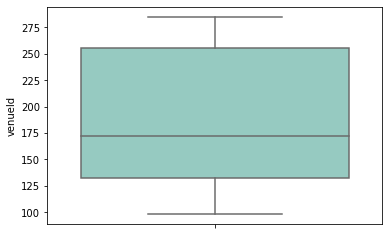

In [81]:
sns.boxplot(y='venueId', palette="Set3", data=checkin_count.iloc[2:20])

[Text(0, 0, 'Train Station'),
 Text(0, 0, 'Subway'),
 Text(0, 0, 'Ramen /  Noodle House'),
 Text(0, 0, 'Convenience Store'),
 Text(0, 0, 'Park'),
 Text(0, 0, 'Japanese Restaurant'),
 Text(0, 0, 'Food & Drink Shop'),
 Text(0, 0, 'Bar'),
 Text(0, 0, 'Road'),
 Text(0, 0, 'Bridge'),
 Text(0, 0, 'Electronics Store'),
 Text(0, 0, 'Mall'),
 Text(0, 0, 'Office'),
 Text(0, 0, 'Café'),
 Text(0, 0, 'Coffee Shop'),
 Text(0, 0, 'Bus Station'),
 Text(0, 0, 'Arcade'),
 Text(0, 0, 'Bookstore'),
 Text(0, 0, 'Fast Food Restaurant'),
 Text(0, 0, 'Other Great Outdoors')]

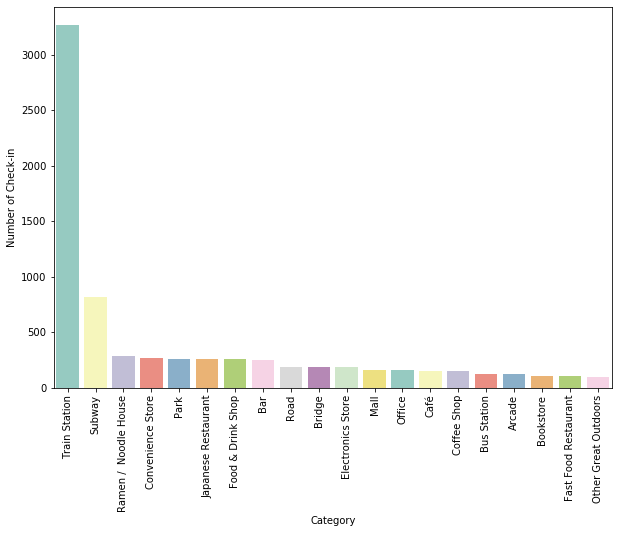

In [82]:

#sns.barplot(x='Category', y="Number of Check-in", data=checkin_count.iloc[0:20])

plt.figure(figsize=(10,7))
chart = sns.barplot(
    data=checkin_count.iloc[0:20],
    x='Category',
    y="Number of Check-in",
    palette='Set3'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [83]:
checkin_count['venueId'][0:20].describe()

count      20.0000
mean      369.5500
std       698.6079
min        98.0000
25%       144.0000
50%       182.5000
75%       259.5000
max      3264.0000
Name: venueId, dtype: float64

In [84]:
#Explore each hostel on Foursquare
LIMIT = 30
radius = 500
nCat = len(place_list)

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


for i in range(hostelcluster+1):
    if i == 0:
        print('cluster:',i)
        df_hostel_foursquare = df_hostel0
    if i == 1:
        print('cluster:',i)
        df_hostel_foursquare = df_hostel1
    if i == 2:
        print('cluster:',i)
        df_hostel_foursquare = df_hostel2
    if i == 3:
        print('cluster:',i)
        df_hostel_foursquare = df_hostel3
    if i == 4:
        print('cluster:',i)
        df_hostel_foursquare = df_hostel4
    if i == 5:
        print('cluster:All')
        df_hostel_foursquare = df_hostelAll
        
        
    for j in range(len(df_hostel_foursquare)):
        latitude = df_hostel_foursquare.iloc[j]['Latitude']
        longitude = df_hostel_foursquare.iloc[j]['Longitude']
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

        results = requests.get(url).json()
        

        items = results['response']['groups'][0]['items']
        items[0]

        dataframe = json_normalize(items) # flatten JSON

        # filter columns
        filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
        dataframe_filtered = dataframe.loc[:, filtered_columns]

        # filter the category for each row
        dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

        # clean columns
        dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

        dataframe_filtered['categories'].unique()
        
        score = 0
        for c in range(dataframe_filtered.shape[0]):

            plus = int(dataframe_filtered.iloc[c]['categories'] in place_list)
            plus2 = int(dataframe_filtered.iloc[c]['categories'] in place_list2)*2
            plus3 = int(dataframe_filtered.iloc[c]['categories'] in place_list3)*2
            score = score + plus + plus2 + plus3
            #if plus+plus2+plus3>0:
                #print(dataframe_filtered.iloc[c]['categories'],'+',plus+plus2+plus3)
        print('There are {} around the hostel {} with score of {}'.format(len(results['response']['groups'][0]['items']),df_hostel_foursquare.iloc[j]['hostel.name'],score))
        #print('score:',score)

cluster: 0
There are 30 around the hostel The Prime Pod Ginza Tokyo with score of 4
There are 30 around the hostel Imano Tokyo Ginza Hostel with score of 7
There are 30 around the hostel Wise Owl Hostels Tokyo with score of 5
There are 30 around the hostel Oakhostel Cabin with score of 6
There are 30 around the hostel Zabutton Hostel with score of 6
cluster: 1
There are 30 around the hostel YADOYA Guesthouse Orange with score of 5
There are 22 around the hostel Tokyo Hostel Fuji with score of 9
There are 29 around the hostel Sheena and Ippei with score of 17
There are 30 around the hostel Hiromas Inn  Chitose-Karasuyama with score of 4
There are 30 around the hostel YADOYA Guesthouse Green with score of 6
cluster: 2
There are 30 around the hostel Hotel&Hostel On the Marks Tokyo Kawasaki with score of 4
There are 30 around the hostel Guesthouse Sensu with score of 12
There are 30 around the hostel 328 Hostel & Lounge with score of 10
There are 30 around the hostel Beagle Tokyo Hostel & 

In [88]:
df_hostel3.iloc[2]

Cluster Labels                  3
hostel.name       Guesthouse Fete
City                        Tokyo
price.from                   2300
summary.score                 9.4
rating.band                Superb
Latitude                  35.7014
Longitude                 139.798
0                        0.251291
1                        0.244819
2                        0.358794
3                       0.0599598
rating.0                 0.553979
rating.1                  0.81862
rating.2                 0.443721
rating.3                 0.414993
rating.summary           0.557828
Name: 104, dtype: object

In [89]:
df_hostel1.iloc[2]

Cluster Labels                   1
hostel.name       Sheena and Ippei
City                         Tokyo
price.from                    3700
summary.score                  9.1
rating.band                 Superb
Latitude                   35.7274
Longitude                  139.693
0                         0.143806
1                         0.353052
2                         0.329769
3                         0.114512
rating.0                  0.937145
rating.1                  0.549544
rating.2                  0.467368
rating.3                   0.21036
rating.summary            0.541104
Name: 288, dtype: object

In [90]:
df_hostelAll

,Cluster Labels,hostel.name,City,price.from,summary.score,rating.band,Latitude,Longitude,0,1,2,3,rating.0,rating.1,rating.2,rating.3,rating.summary
313,0,The Prime Pod Ginza Tokyo,Tokyo,3700,9.0,Superb,35.669269,139.767087,0.235930,0.270602,0.314388,0.023824,0.564939,0.709107,0.484845,1.000000,0.689723
183,0,Imano Tokyo Ginza Hostel,Tokyo,2700,8.9,Fabulous,35.672306,139.772906,0.239622,0.265078,0.320332,0.025835,0.550055,0.715840,0.470562,0.911904,0.662090
334,0,Wise Owl Hostels Tokyo,Tokyo,2000,9.1,Superb,35.674781,139.777275,0.242387,0.260982,0.324964,0.028462,0.555999,0.743413,0.474278,0.846362,0.655013
227,0,Lyuro Tokyo Kiyosumi -The Share Hotels-,Tokyo,3200,9.4,Superb,35.681217,139.792066,0.253042,0.247093,0.339221,0.039096,0.550146,0.811086,0.469323,0.636450,0.616751
241,0,Oakhostel Cabin,Tokyo,2100,9.0,Superb,35.678055,139.785988,0.248810,0.252704,0.332938,0.033725,0.535693,0.759330,0.457831,0.706414,0.614817
12,0,Akihabara Hotel 3000,Tokyo,2200,10.0,Superb,35.697490,139.779382,0.235080,0.262309,0.344390,0.051266,0.629979,0.812807,0.491786,0.516346,0.612729
198,0,Kaisu Hostel,Tokyo,3900,9.4,Superb,35.669916,139.734537,0.207664,0.303101,0.296449,0.045967,0.670360,0.661211,0.537037,0.541323,0.602483
99,0,Guest House Shinagawa-shuku Tokyo,Tokyo,3300,9.2,Superb,35.621779,139.740358,0.241670,0.297463,0.260489,0.041820,0.563776,0.659408,0.598171,0.582339,0.600923
341,0,Zabutton Hostel,Tokyo,2900,8.6,Fabulous,35.655470,139.742116,0.222038,0.294770,0.288555,0.033210,0.573604,0.622035,0.504773,0.685490,0.596476
235,0,Nihonbashi Muromachi BAY HOTEL,Tokyo,4000,9.2,Superb,35.687297,139.775679,0.235597,0.264192,0.333975,0.040831,0.578310,0.742451,0.466552,0.596453,0.595942
